In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.7 MB/s eta 0:00:00


####Crea una lista ficticia de 30 transacciones, les asigna montos y países al azar, y marca como "fraude" aquellas que ocurren fuera de Argentina durante la noche.

In [ ]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

# Parámetros del dataset
seed = 42
num_usuarios = 50
monto_minimo = 10.00
monto_maximo = 10000.00
tipos_transaccion = ['Compra', 'Transferencia', 'Retiro', 'Pago Servicio', 'Reembolso']
tipos_comercio = ['Tienda A', 'Online', 'Joyería', 'Restaurante', 'Electrónicos', 'Supermercado', 'Cajero', 'Gasolinera', 'Farmacia', 'Librería']
paises = ['Argentina', 'Estados Unidos', 'España', 'México', 'Colombia', 'Chile']

nombres_usuarios = [fake.name() for _ in range(num_usuarios)]

# Generación de datos para transacciones
num_transacciones = 30
ids_transaccion = range(1, num_transacciones + 1)
montos = [round(random.uniform(monto_minimo, monto_maximo), 2) for _ in range(num_transacciones)]
# Simulación de tiempo de transacción como una fecha y hora aleatoria
fechas_transaccion = [datetime.now() - timedelta(minutes=random.randint(1, 1440)) for _ in range(num_transacciones)] #Hasta 1 dia atras.
tipos_transaccion_list = [random.choice(tipos_transaccion) for _ in range(num_transacciones)]
tipos_comercio_list = [random.choice(tipos_comercio) for _ in range(num_transacciones)]
paises_list = [random.choice(paises) for _ in range(num_transacciones)]
#Inicializo en cero.
es_fraude_list = [0] * num_transacciones

# Lógica para detectar transacciones fraudulentas
for i in range(num_transacciones):
    hora_transaccion = fechas_transaccion[i].hour
    pais_transaccion = paises_list[i]

    # Verificar si la transacción es fuera de Argentina y en horario nocturno
    if pais_transaccion != 'Argentina' and (hora_transaccion >= 22 or hora_transaccion < 6):
        es_fraude_list[i] = 1

# Creación del DataFrame
data_transacciones = {
    'ID_Transaccion': ids_transaccion,
    'Usuario': [random.choice(nombres_usuarios) for _ in range(num_transacciones)],
    'Monto': montos,
    'Fecha_Hora_Transaccion': fechas_transaccion,
    'Tipo_Transaccion': tipos_transaccion_list,
    'Tipo_Comercio': tipos_comercio_list,
    'Pais': paises_list,
    'Es_Fraude': es_fraude_list
}

df_transacciones = pd.DataFrame(data_transacciones)

# Guardar el DataFrame a un archivo CSV
nombre_archivo_csv = 'datos_tarjetas.csv'
df_transacciones.to_csv(nombre_archivo_csv, index=False)

print(f"El DataFrame se ha guardado correctamente como '{nombre_archivo_csv}'.")

# Mostrar las primeras filas del DataFrame para verificar
df_transacciones

El DataFrame se ha guardado correctamente como 'datos_tarjetas.csv'.


,ID_Transaccion,Usuario,Monto,Fecha_Hora_Transaccion,Tipo_Transaccion,Tipo_Comercio,Pais,Es_Fraude
0,1,Brittany Peterson,8343.94,2025-12-20 09:31:01.024436,Compra,Librería,Colombia,0
1,2,Keith Vasquez,5069.10,2025-12-20 16:12:01.024464,Transferencia,Electrónicos,Colombia,0
2,3,April Burton,3575.99,2025-12-20 09:18:01.024473,Retiro,Joyería,Colombia,0
3,4,James Oliver,5718.58,2025-12-19 20:50:01.024479,Pago Servicio,Tienda A,España,0
4,5,Diane Anderson,711.60,2025-12-20 08:54:01.024483,Reembolso,Tienda A,Chile,0
5,6,Brittney Hawkins,4650.74,2025-12-19 19:50:01.024489,Transferencia,Online,Colombia,0
6,7,James Oliver,1413.35,2025-12-20 07:07:01.024493,Reembolso,Online,Colombia,0
7,8,Joseph Acosta,5446.81,2025-12-20 00:02:01.024497,Compra,Cajero,España,1
8,9,Erik Harris,7662.72,2025-12-20 14:05:01.024501,Compra,Cajero,Chile,0
9,10,Tommy Roberts,3886.08,2025-12-19 22:31:01.024506,Retiro,Gasolinera,España,1


###**Algoritmo Anti-Fraude 360**


Análisis Exploratorio de Datos:
       ID_Transaccion        Monto  Es_Fraude  Hora_Transaccion
count       30.000000    30.000000  30.000000         30.000000
mean        15.500000  4899.302667   0.233333         13.666667
std          8.803408  2653.991185   0.430183          7.092168
min          1.000000   159.530000   0.000000          0.000000
25%          8.250000  2890.757500   0.000000          8.250000
50%         15.500000  5087.160000   0.000000         15.500000
75%         22.750000  6719.360000   0.000000         20.000000
max         30.000000  9773.830000   1.000000         23.000000

Conteo de clases en Es_Fraude:
Es_Fraude
0    23
1     7
Name: count, dtype: int64


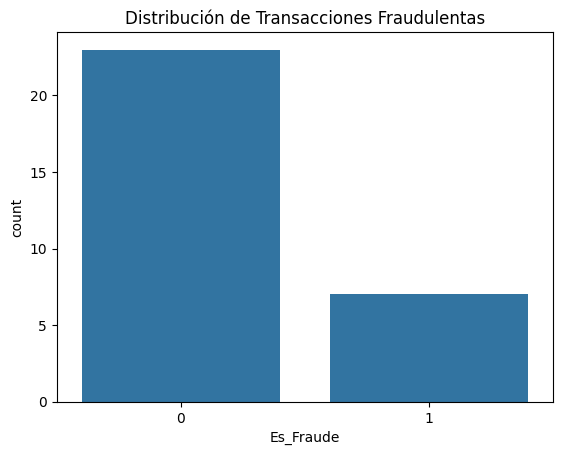

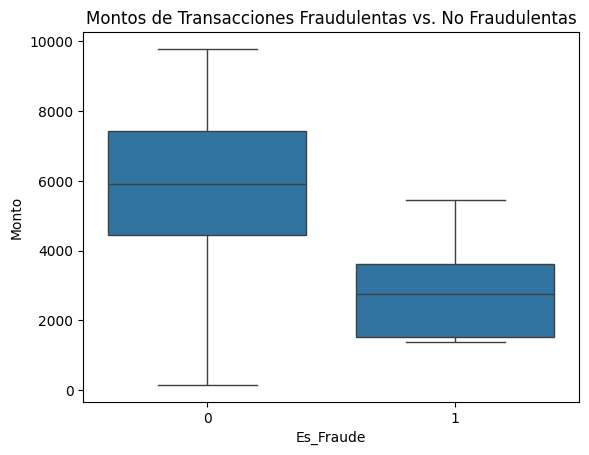


Modelo de Regresión Logística:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.00      0.00      0.00         2

    accuracy                           0.67         9
   macro avg       0.38      0.43      0.40         9
weighted avg       0.58      0.67      0.62         9

Precisión: 0.6666666666666666

Modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9

Precisión: 0.7777777777777778

Conclusiones y Operaciones Sospechosas:

Las 10 caracteristicas mas importantes son:
 Hora_Transaccion              0.226493
Monto                         0.164241
Usuario_David Chandler        0.074053
Usuario_Linda Robinson  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings

# Configuración para limpiar la consola de advertencias
warnings.filterwarnings("ignore")

# 1. Cargar el dataset de transacciones fraudulentas
# Asegúrate de que el archivo 'datos_tarjetas.csv' esté en tu carpeta de Colab
df_tarjetas = pd.read_csv('datos_tarjetas.csv')

# Pre-procesamiento de hora necesario para el análisis
df_tarjetas['Hora_Transaccion'] = pd.to_datetime(df_tarjetas['Fecha_Hora_Transaccion']).dt.hour

# 2. Análisis Exploratorio de Datos (EDA)
print("\nAnálisis Exploratorio de Datos:")
# Mostramos estadísticas de las columnas numéricas principales
print(df_tarjetas[['ID_Transaccion', 'Monto', 'Es_Fraude', 'Hora_Transaccion']].describe())
print("\nConteo de clases en Es_Fraude:")
print(df_tarjetas['Es_Fraude'].value_counts())

# Visualizaciones (opcional, pero recomendadas para el reporte)
sns.countplot(x='Es_Fraude', data=df_tarjetas)
plt.title('Distribución de Transacciones Fraudulentas')
plt.show()

sns.boxplot(x='Es_Fraude', y='Monto', data=df_tarjetas)
plt.title('Montos de Transacciones Fraudulentas vs. No Fraudulentas')
plt.show()

# 3. Preprocesamiento de Datos para el Modelo
# Incluimos 'Usuario' en dummies como en tu salida anterior
df_encoded = pd.get_dummies(df_tarjetas, columns=['Tipo_Comercio', 'Pais', 'Usuario', 'Tipo_Transaccion'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID_Transaccion', 'Fecha_Hora_Transaccion'])

# 4. Separación de Datos en Entrenamiento y Prueba
X = df_encoded.drop('Es_Fraude', axis=1)
y = df_encoded['Es_Fraude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Escalado de Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Modelos de Detección de Fraude

# 6.1 Regresión Logística
print("\nModelo de Regresión Logística:")
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
# Usamos zero_division=0 para evitar la advertencia si el modelo no predice una clase
print(classification_report(y_test, y_pred_lr, zero_division=0))
print(f"Precisión: {accuracy_score(y_test, y_pred_lr)}")

# 6.2 Random Forest
print("\nModelo de Random Forest:")
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf, zero_division=0))
print(f"Precisión: {accuracy_score(y_test, y_pred_rf)}")

# 7. Conclusiones y operaciones sospechosas
print("\nConclusiones y Operaciones Sospechosas:")

# Características importantes del Random Forest
feature_importance = pd.Series(model_rf.feature_importances_, index=X_train.columns)
print("\nLas 10 caracteristicas mas importantes son:\n", feature_importance.nlargest(10))

print("\noperaciones sospechosas detectadas:")
# Obtenemos las probabilidades
rf_pred_probabilities = model_rf.predict_proba(X_test_scaled)[:, 1]

# Ajustamos el umbral a 0.5 para asegurar que capturemos sospechas en datasets pequeños
umbral = 0.5
transacciones_sospechosas = X_test[rf_pred_probabilities >= umbral]

if transacciones_sospechosas.empty:
    print("No se encontraron transacciones que superen el umbral de confianza.")
else:
    # Añadimos la probabilidad para mayor claridad
    transacciones_sospechosas['Probabilidad_Fraude'] = rf_pred_probabilities[rf_pred_probabilities >= umbral]
    print(transacciones_sospechosas.head())

print("\nLas predicciones del Random forest suelen tener una precisión más alta y detectan mejor el fraude en datos complejos.")

###Video

###1️⃣ INSTALAR LIBRERÍAS (si no están)

In [ ]:
!pip install gtts moviepy matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.1
    Uninstalling click-8.3.1:
      Successfully uninstalled click-8.3.1


###2️⃣ IMPORTS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from gtts import gTTS
from moviepy.editor import *
import os


###3️⃣ DEFINIR DATASET Y SALIDAS REALES

In [ ]:
# Dataset real
df = df_tarjetas.copy()

# Salida del modelo Random Forest
predicciones = y_pred_rf
prob_fraude = rf_pred_probabilities


In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Hora_Transaccion', hue='Es_Fraude', data=df_tarjetas)
plt.title("Distribución horaria de transacciones y fraude")
plt.xlabel("Hora de la transacción")
plt.ylabel("Cantidad")
plt.legend(title="Es Fraude")
plt.tight_layout()
plt.savefig("04_fraude_por_hora.png")
plt.close()


##🟦 2️⃣ MATRIZ DE CONFUSIÓN – RANDOM FOREST

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión – Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.savefig("05_matriz_confusion_rf.png")
plt.close()


##🟦 3️⃣ IMPORTANCIA DE VARIABLES (TOP 10)

In [ ]:
top_features = feature_importance.nlargest(10).sort_values()

plt.figure(figsize=(6,4))
top_features.plot(kind='barh')
plt.title("Top 10 variables más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.savefig("06_importancia_variables.png")
plt.close()


##🟦 4️⃣ TRANSACCIONES SOSPECHOSAS (PROFESIONAL)

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(rf_pred_probabilities, bins=20)
plt.axvline(0.5, color='red', linestyle='--')
plt.title("Distribución de probabilidades de fraude")
plt.xlabel("Probabilidad estimada")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("07_probabilidades_fraude_hist.png")
plt.close()


###🎬 INTEGRACIÓN AL VIDEO (3 MINUTOS)

In [ ]:
imagenes = [
    "01_distribucion_fraude.png",
    "02_monto_fraude.png",
    "04_fraude_por_hora.png",
    "05_matriz_confusion_rf.png",
    "06_importancia_variables.png",
    "07_probabilidades_fraude_hist.png",
    "03_probabilidad_fraude.png"
]


In [ ]:
DURACION_TOTAL = 180
duracion_por_imagen = DURACION_TOTAL / len(imagenes)

clips = [ImageClip(img).set_duration(duracion_por_imagen) for img in imagenes]


###5️⃣ GUIÓN EDUCATIVO – NIVEL PROFESIONAL (~3 MIN)

In [ ]:
script = """
En este video analizamos un algoritmo profesional de detección de fraude
aplicado a transacciones con tarjetas de crédito, utilizando técnicas de
análisis de datos y modelos de machine learning.

El conjunto de datos utilizado contiene registros individuales de operaciones
financieras. Cada fila representa una transacción, mientras que las columnas
describen características relevantes, como el monto de la operación, el tipo
de comercio, el país, el usuario, el tipo de transacción y el momento exacto
en que ocurrió.

Como primer paso, se realiza un análisis exploratorio de los datos.
Este análisis permite comprender la distribución de las transacciones
fraudulentas y no fraudulentas, así como identificar patrones generales
en los montos y en los horarios de operación.
Este paso es fundamental, ya que un buen entendimiento de los datos
mejora significativamente la calidad del modelo final.

Luego, los datos son preprocesados para que puedan ser utilizados
por los algoritmos de aprendizaje automático.
Las variables categóricas se transforman en variables numéricas,
y las características se escalan para garantizar un entrenamiento adecuado.

A continuación, se entrenan dos modelos de detección de fraude.
El primero es una regresión logística, que sirve como modelo base
por su simplicidad e interpretabilidad.
El segundo modelo es un Random Forest, un algoritmo más robusto
capaz de capturar relaciones complejas entre las variables.

El modelo de Random Forest combina múltiples árboles de decisión
para aprender patrones de comportamiento financiero.
Gracias a este enfoque, logra una mayor precisión en la detección
de transacciones sospechosas, especialmente en datos complejos.

Además de clasificar las transacciones, el modelo calcula una
probabilidad de fraude para cada operación.
Cuando esta probabilidad supera un umbral definido,
la transacción es marcada como sospechosa y priorizada
para su análisis manual.

Este enfoque no busca confirmar automáticamente un fraude,
sino reducir el volumen de operaciones que deben ser revisadas,
permitiendo que los analistas se concentren en los casos de mayor riesgo.

Finalmente, el análisis de la importancia de las variables
permite identificar qué factores influyen más en la detección del fraude,
aportando transparencia y valor interpretativo al modelo.

En conclusión, este ejemplo demuestra cómo el uso de modelos de
machine learning, como Random Forest, permite mejorar la detección
temprana de fraude, optimizar recursos y fortalecer los controles
internos en entornos financieros modernos.

"""


###6️⃣ GENERAR VOZ FEMENINA

In [ ]:
tts = gTTS(text=script, lang="es", slow=False)
tts.save("voz_femenina.mp3")


###7️⃣ CREAR VIDEO FINAL (~3 MIN)

In [ ]:
from moviepy.editor import (
    ImageClip,
    AudioFileClip,
    concatenate_videoclips,
    concatenate_audioclips
)
from moviepy.audio.AudioClip import AudioClip
import numpy as np

# ----------------------------
# CONFIGURACIÓN
# ----------------------------
DURACION_TOTAL = 180  # 3 minutos exactos

imagenes = [
    "01_distribucion_fraude.png",
    "02_monto_fraude.png",
    "04_fraude_por_hora.png",
    "05_matriz_confusion_rf.png",
    "06_importancia_variables.png",
    "07_probabilidades_fraude_hist.png",
    "03_probabilidad_fraude.png"
]

# ----------------------------
# VIDEO
# ----------------------------
duracion_por_imagen = DURACION_TOTAL / len(imagenes)

clips = [
    ImageClip(img).set_duration(duracion_por_imagen)
    for img in imagenes
]

video = concatenate_videoclips(clips, method="compose")

# ----------------------------
# AUDIO (voz + silencio)
# ----------------------------
audio_voz = AudioFileClip("voz_femenina.mp3")

duracion_audio = audio_voz.duration

if duracion_audio < DURACION_TOTAL:
    # Crear silencio para completar 180s
    duracion_silencio = DURACION_TOTAL - duracion_audio

    silencio = AudioClip(
        make_frame=lambda t: np.zeros((1,)),
        duration=duracion_silencio,
        fps=44100
    )

    audio_final = concatenate_audioclips([audio_voz, silencio])
else:
    audio_final = audio_voz.subclip(0, DURACION_TOTAL)

# ----------------------------
# UNIR AUDIO + VIDEO
# ----------------------------
video = video.set_audio(audio_final).set_duration(DURACION_TOTAL)

# ----------------------------
# EXPORTAR
# ----------------------------
video.write_videofile(
    "video_explicativo_fraude_profesional_3min.mp4",
    fps=24,
    codec="libx264",
    audio_codec="aac"
)



t:  37%|███▋      | 1607/4320 [01:52<01:15, 36.07it/s, now=None]

chunk:  63%|██████▎   | 2516/3970 [01:08<00:03, 404.86it/s, now=None]

Moviepy - Building video video_explicativo_fraude_profesional_3min.mp4.
MoviePy - Writing audio in video_explicativo_fraude_profesional_3minTEMP_MPY_wvf_snd.mp4




chunk:   0%|          | 0/3970 [00:00<?, ?it/s, now=None]

chunk:   2%|▏         | 81/3970 [00:00<00:04, 803.43it/s, now=None]

chunk:   4%|▍         | 162/3970 [00:00<00:17, 212.49it/s, now=None]

chunk:   5%|▌         | 204/3970 [00:00<00:20, 182.38it/s, now=None]

chunk:   6%|▌         | 233/3970 [00:01<00:22, 165.69it/s, now=None]

chunk:   6%|▋         | 256/3970 [00:01<00:22, 166.69it/s, now=None]

chunk:   7%|▋         | 286/3970 [00:01<00:19, 188.36it/s, now=None]

chunk:   8%|▊         | 310/3970 [00:01<00:18, 198.55it/s, now=None]

chunk:   8%|▊         | 334/3970 [00:01<00:18, 199.93it/s, now=None]

chunk:   9%|▉         | 362/3970 [00:01<00:16, 217.22it/s, now=None]

chunk:  10%|▉         | 386/3970 [00:01<00:16, 214.85it/s, now=None]

chunk:  10%|█         | 412/3970 [00:01<00:15, 226.26it/s, now=None]

chunk:  11%|█         | 436/3970 [00:02<00:18, 196.12it/s, now=None]

chunk:  12%|█▏        | 465/3970 [00:02<00:15, 219.17it/s, now=None]

chunk:  12%|█▏        | 496/39

MoviePy - Done.
Moviepy - Writing video video_explicativo_fraude_profesional_3min.mp4





t:   0%|          | 0/4320 [00:00<?, ?it/s, now=None]

t:   0%|          | 6/4320 [00:00<01:13, 58.74it/s, now=None]

t:   0%|          | 12/4320 [00:00<01:13, 58.45it/s, now=None]

t:   0%|          | 18/4320 [00:00<01:13, 58.40it/s, now=None]

t:   1%|          | 25/4320 [00:00<01:12, 59.32it/s, now=None]

t:   1%|          | 31/4320 [00:00<01:12, 59.05it/s, now=None]

t:   1%|          | 38/4320 [00:00<01:11, 59.87it/s, now=None]

t:   1%|          | 44/4320 [00:00<01:13, 57.82it/s, now=None]

t:   1%|          | 50/4320 [00:00<01:18, 54.61it/s, now=None]

t:   1%|▏         | 56/4320 [00:00<01:18, 54.10it/s, now=None]

t:   1%|▏         | 62/4320 [00:01<01:19, 53.38it/s, now=None]

t:   2%|▏         | 68/4320 [00:01<01:27, 48.80it/s, now=None]

t:   2%|▏         | 73/4320 [00:01<01:30, 46.76it/s, now=None]

t:   2%|▏         | 78/4320 [00:01<01:35, 44.32it/s, now=None]

t:   2%|▏         | 83/4320 [00:01<01:42, 41.45it/s, now=None]

t:   2%|▏         | 88/4320 [00:01<01:45, 40.13i

Moviepy - Done !
Moviepy - video ready video_explicativo_fraude_profesional_3min.mp4
